# 05. Machine Learning - Clustering

## This notebook contains the following:

### 1. Import libraries and create df with noncategorical data
### 2. Standardize data
### 3. Elbow technique
### 4. k-means clustering

### 1. Import libraries

In [12]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
#define path
path = r'/Users/mindydong/Documents/School/Data Analyst/Achievement 6 /Medicare QPP/'

In [3]:
#import data
qpp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'state_agg.pkl'))

In [4]:
#remove categorical variables from dataset
qpp2 = qpp[['number_of_users', 'number_of_providers', 'number_ffs_members', 'total_payment']]

### 2. Standardize data

Since my data is significantly spread due to the total_payments column (payments in the billions vs users in millions, and providers even less than that), I decided that standardizing the data using the standardscaler would be the best.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaled = scaler.fit_transform(qpp2)
scaled

array([[-0.1489474 , -0.31997039, -0.26861395, -0.26196615],
       [-0.46384507, -0.38394082, -0.90166819, -0.35937201],
       [-0.17318151, -0.30638374, -0.0009688 , -0.29858519],
       ...,
       [-0.44393588, -0.30808208, -0.6657864 , -0.36643183],
       [-0.4476971 , -0.32676371, -0.10867545, -0.36521936],
       [-0.48904622, -0.38450693, -0.86452533, -0.36826474]])

In [8]:
#export scatterplot
user_provider_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'user_provider_scatter.png'))
score

NameError: name 'user_provider_scatter' is not defined

### 3. Elbow technique

In [9]:
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
score = [kmeans[i].fit(qpp2).score(qpp2) for i in range(len(kmeans))]
score

/Users/mindydong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mindydong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mindydong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mindydong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

[-6.394671236467158e+21,
 -2.003675451985226e+21,
 -1.0563126688888485e+21,
 -5.587810658115981e+20,
 -3.811461404584695e+20,
 -2.4371910897000694e+20,
 -1.8702073861325868e+20,
 -1.3869398199053835e+20,
 -1.1156255010375246e+20]

Text(0.5, 1.0, 'Elbow Curve')

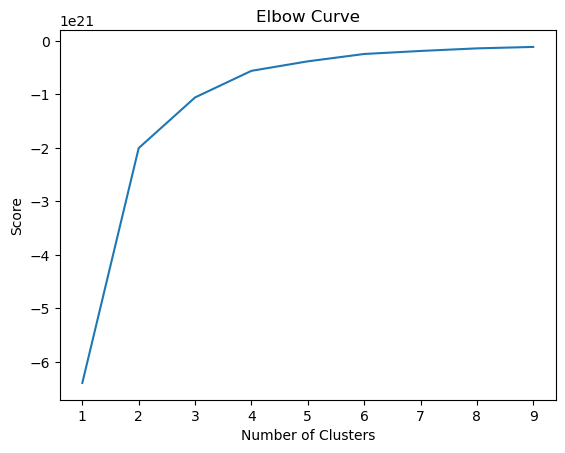

In [11]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

In [13]:
#create k-means object
kmeans = KMeans(n_clusters = 4)

In [14]:
kmeans.fit(qpp2)

/Users/mindydong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [15]:
qpp2['clusters'] = kmeans.fit_predict(qpp2)

/Users/mindydong/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2d/wsjd0mc13vl4q6p45np_hyx00000gn/T/ipykernel_10728/11304045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qpp2['clusters'] = kmeans.fit_predict(qpp2)


In [16]:
qpp2.head

<bound method NDFrame.head of         number_of_users  number_of_providers  number_ffs_members  \
231625          73215.0                146.0            547486.0   
231626           8414.0                 33.0             91480.0   
231627          68228.0                170.0            740278.0   
231628          54014.0                 86.0            437616.0   
231629         385799.0                330.0           3423285.0   
...                 ...                  ...                 ...   
987484          40978.0                423.0           1185624.0   
987485          26563.0                435.0            935054.0   
987486          12511.0                167.0            261392.0   
987487          11737.0                134.0            662694.0   
987488           3228.0                 32.0            118235.0   

        total_payment  clusters  
231625   7.464155e+07         0  
231626   6.904088e+06         0  
231627   4.917614e+07         0  
231628   4.951514

In [17]:
qpp2['clusters'].value_counts()

0    11364
2     1420
3      337
1      102
Name: clusters, dtype: int64

In [19]:
qpp2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'qpp_clusters.csv'))

Text(0, 0.5, 'Total Payment')

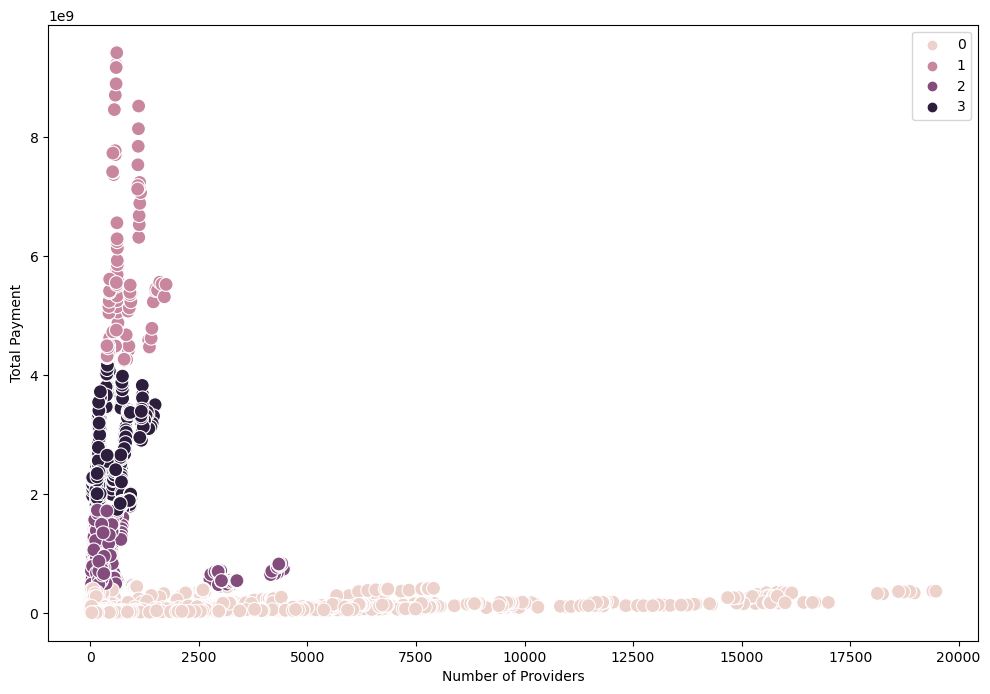

In [18]:
#plot clusters for total_payment and number_of_providers
plt.figure(figsize=(12,8))
ab = sns.scatterplot(x=qpp2['number_of_providers'], y=qpp2['total_payment'], hue=kmeans.labels_, s=100)
ab.grid(False)
plt.xlabel('Number of Providers')
plt.ylabel('Total Payment')

These clusters look reasonable. The two small clusters of cluster 3 between 2500 and 5000 may be worth looking into later.

In [24]:
qpp2.groupby('clusters').agg({'total_payment':['mean', 'median'], 
                         'number_of_providers':['mean', 'median'], 
                         'number_of_users':['mean', 'median'],
                          'number_ffs_members':['mean', 'median']})

total_payment               number_of_providers         \
                  mean        median                mean median   
clusters                                                          
0         6.730943e+07  3.001613e+07          768.699314  157.0   
1         5.734679e+09  5.391169e+09          767.529412  613.0   
2         2.649450e+09  2.559696e+09          459.347181  229.0   
3         8.120989e+08  7.018817e+08          306.850000  159.0   

         number_of_users           number_ffs_members             
                    mean    median               mean     median  
clusters                                                          
0           88438.262936   27952.5       6.585308e+05   479371.0  
1          717846.029412  882427.0       2.792078e+06  2626791.0  
2          320445.792285  276179.0       1.694150e+06  1313223.0  
3          131829.332394   40010.5       1.027225e+06   835976.0

In [25]:
#export scatterplot
ab.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'kmeans_scatter_pay_prov.png'))

Text(0, 0.5, 'Total Payment')

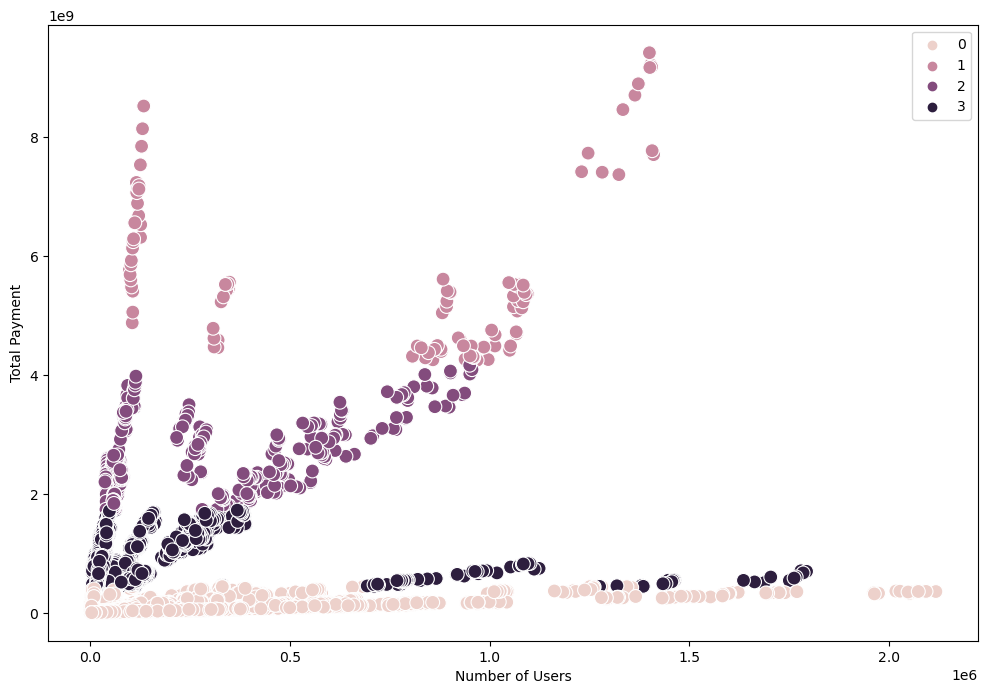

In [27]:
#plot clusters for total_payment and number_of_users
plt.figure(figsize=(12,8))
ab2 = sns.scatterplot(x=qpp2['number_of_users'], y=qpp2['total_payment'], hue=kmeans.labels_, s=100)
ab2.grid(False)
plt.xlabel('Number of Users')
plt.ylabel('Total Payment')

These clusters also look fairly reasonable and this scatterplot looks somewhat similar to the first one, except more fanned out and not clustered against at x=0.

In [28]:
#export scatterplot
ab2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'kmeans_scatter_pay_user.png'))

Text(0, 0.5, 'Number of providers')

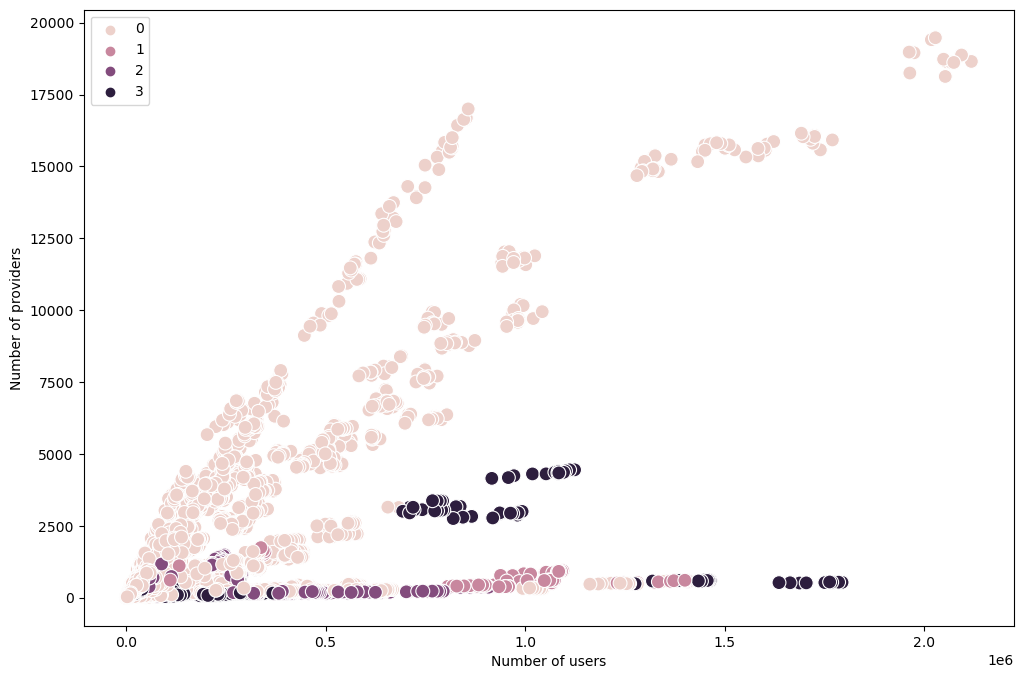

In [29]:
#plot clusters for number_of_providers and number_of_users
plt.figure(figsize=(12,8))
ab3 = sns.scatterplot(x=qpp2['number_of_users'], y=qpp2['number_of_providers'], hue=kmeans.labels_, s=100)
ab3.grid(False)
plt.xlabel('Number of users')
plt.ylabel('Number of providers')

Regarding the above scatterplot, these clusters do not make much sense. Cluster 0 seems to make the most sense, but the distribution looks like a large fan.

### Question 10

In first two scatterplots, groups 0 and 3, and 1 and 2 are the closest in terms of median and mean. It would be interesting to see which categorical properties would make them similar. My suspicion is that it has something to do with type of service. 